In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
import os
import pickle

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, Flatten, GRU, LSTM
from keras.regularizers import L2, L1L2
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score,
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc)

# Data Import

In [ ]:
x_train = pd.read_csv("./drive/MyDrive/IDS_ML_Dataset/Preprocessed_data/x_train.csv")
y_train = pd.read_csv("./drive/MyDrive/IDS_ML_Dataset/Preprocessed_data/y_train.csv")

In [ ]:
x_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,False,False,False,False,True,False
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,False,False,False,False,True,False
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,True,False,False,False,False,False
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,False,False,False,False,False,False,False,False,True,False
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,True,False,False,False,False,False
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,False,False,False,False,True,False
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,False,False,False,False,False,False,False,False,True,False
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
y_train

,Label
0,11
1,11
2,9
3,11
4,11
...,...
125968,9
125969,11
125970,11
125971,9


In [ ]:
x_train.info(), print(), y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 122 entries, duration to SH
dtypes: bool(84), float64(38)
memory usage: 46.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Label   125973 non-null  int64
dtypes: int64(1)
memory usage: 984.3 KB


(None, None, None)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.3, random_state=42)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((88181, 122), (37792, 122), (88181, 1), (37792, 1))

# ML Models

In [ ]:
model_names, f1, precision, recall = [], [], [], []

def eval_save_ml_model(model, model_name):
    y_pred = model.predict(x_val)
    f1score, precisionscore, recallscore = f1_score(y_val, y_pred, average="weighted")*100, precision_score(y_val, y_pred, average="weighted")*100, recall_score(y_val, y_pred, average="weighted")*100
    print(f"model       : {model_name}")
    print(f"f1_score    : {f1score:.4f}")
    print(f"precision   : {precisionscore:.4f}")
    print(f"recall      : {recallscore:.4f}")
    model_names.append(model_name)
    f1.append(f1score)
    precision.append(precisionscore)
    recall.append(recallscore)
    pickle.dump(model, open(f"./drive/MyDrive/IDS_ML_Dataset/Saved_models/{model_name}.pkl", "wb"))

## Softmax

In [ ]:
softmax_classifier = LogisticRegression(
    multi_class="multinomial", max_iter=500, verbose=1)
softmax_classifier.fit(X=x_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, multi_class='multinomial', verbose=1)

In [ ]:
eval_save_ml_model(softmax_classifier, "softmax_classifier")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : softmax_classifier
f1_score    : 99.1280
precision   : 99.1301
recall      : 99.1374


## KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Minimum error:- 0.6057941466707827 at K = 26


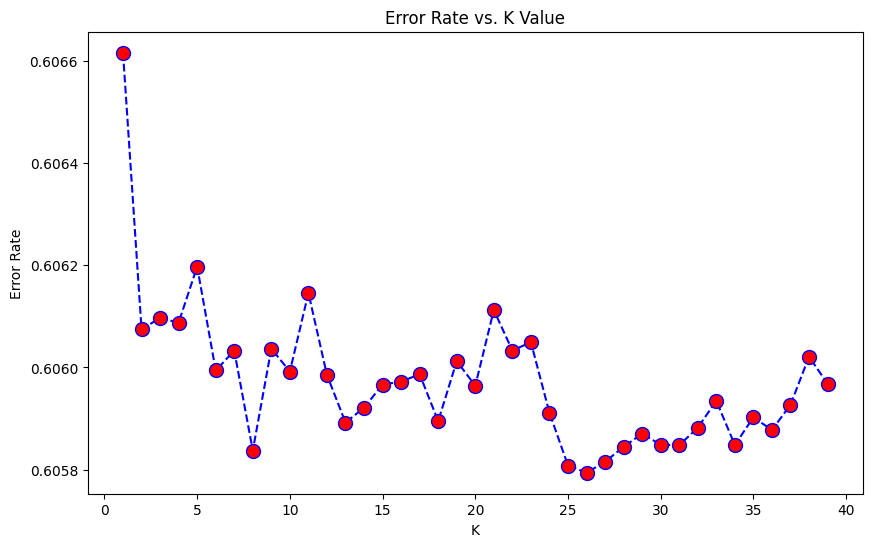

In [ ]:
z = np.array(y_val)

error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_val)
    error_rate.append(np.mean(pred_i != z))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-", min(error_rate), "at K =", req_k_value)

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors=25)
KNN_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [ ]:
eval_save_ml_model(KNN_classifier, "KNN_classifier")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : KNN_classifier
f1_score    : 99.1847
precision   : 99.1539
recall      : 99.2273


## Naive Bayes

In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X=x_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
eval_save_ml_model(NB_classifier, "NB_classifier")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : NB_classifier
f1_score    : 87.1790
precision   : 94.8255
recall      : 82.7768


## SVM

In [ ]:
Linear_SVC = SVC(kernel="linear")
Linear_SVC.fit(X=x_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
eval_save_ml_model(Linear_SVC, "Linear_SVC")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : Linear_SVC
f1_score    : 99.2478
precision   : 99.2514
recall      : 99.2538


In [ ]:
Polynomial_SVC = SVC(kernel="poly")
Polynomial_SVC.fit(X=x_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [ ]:
eval_save_ml_model(Polynomial_SVC, "Polynomial_SVC")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : Polynomial_SVC
f1_score    : 99.0733
precision   : 99.0613
recall      : 99.0950


In [ ]:
Sigmoid_SVC = SVC(kernel="sigmoid")
Sigmoid_SVC.fit(X=x_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [ ]:
eval_save_ml_model(Sigmoid_SVC, "Sigmoid_SVC")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : Sigmoid_SVC
f1_score    : 90.5896
precision   : 90.7190
recall      : 90.7441


In [ ]:
Rbf_SVC = SVC(kernel="rbf")
Rbf_SVC.fit(X=x_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
eval_save_ml_model(Rbf_SVC, "Rbf_SVC")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : Rbf_SVC
f1_score    : 99.1185
precision   : 99.0999
recall      : 99.1453


## Decision Tree

In [ ]:
Decisiontree_classifier1 = DecisionTreeClassifier()
Decisiontree_classifier1.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
eval_save_ml_model(Decisiontree_classifier1, "Decisiontree_classifier1")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : Decisiontree_classifier1
f1_score    : 99.6870
precision   : 99.6923
recall      : 99.6878


In [ ]:
Decisiontree_classifier2 = DecisionTreeClassifier(max_depth=6)
Decisiontree_classifier2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
eval_save_ml_model(Decisiontree_classifier2, "Decisiontree_classifier_depth-6")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : Decisiontree_classifier_depth-6
f1_score    : 97.0076
precision   : 96.7151
recall      : 97.4862


## Random Forest

In [ ]:
Randomforest_classifier = RandomForestClassifier()
Randomforest_classifier.fit(x_train, y_train)

<ipython-input-29-34adc1ec3def>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Randomforest_classifier.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
eval_save_ml_model(Randomforest_classifier, "Randomforest_classifier")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : Randomforest_classifier
f1_score    : 99.8132
precision   : 99.8085
recall      : 99.8280


## ANN

In [ ]:
x_train = pd.read_csv("./drive/MyDrive/IDS_ML_Dataset/Preprocessed_data/x_train_DL.csv")
y_train = pd.read_csv("./drive/MyDrive/IDS_ML_Dataset/Preprocessed_data/y_train_DL.csv")

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train.info(), y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 122 entries, 0 to 121
dtypes: float64(122)
memory usage: 117.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  float64
 1   1       125973 non-null  float64
 2   2       125973 non-null  float64
 3   3       125973 non-null  float64
 4   4       125973 non-null  float64
 5   5       125973 non-null  float64
 6   6       125973 non-null  float64
 7   7       125973 non-null  float64
 8   8       125973 non-null  float64
 9   9       125973 non-null  float64
 10  10      125973 non-null  float64
 11  11      125973 non-null  float64
 12  12      125973 non-null  float64
 13  13      125973 non-null  float64
 14  14      125973 non-null  float64
 15  15      125973 non-null  float64
 16  16      125973 non-null  float64
 17  17      1

(None, None)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.3, random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((88181, 122), (88181, 23), (37792, 122), (37792, 23))

In [ ]:
def eval_save_dl_model(model, model_name):
    if model_name == "GRU_model" or model_name == "LSTM_model":
        y_pred = model.predict(np.asarray(x_val)[:, np.newaxis, :])
    else:
        y_pred = model.predict(x_val)
    y_pred = np.argmax(y_pred, axis=1)
    temp_y_val = np.argmax(y_val.values, axis=1)
    f1score, precisionscore, recallscore = f1_score(temp_y_val, y_pred, average="weighted")*100, precision_score(temp_y_val, y_pred, average="weighted")*100, recall_score(temp_y_val, y_pred, average="weighted")*100
    print(f"model       : {model_name}")
    print(f"f1_score    : {f1score:.4f}")
    print(f"precision   : {precisionscore:.4f}")
    print(f"recall      : {recallscore:.4f}")
    model_names.append(model_name)
    f1.append(f1score)
    precision.append(precisionscore)
    recall.append(recallscore)
    model.save(f"./drive/MyDrive/IDS_ML_Dataset/Saved_models/{model_name}.keras")

In [ ]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=5, mode="max")

In [ ]:
ANN_model = Sequential()

ANN_model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]),
                          kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=L2(1e-4),
                          activity_regularizer=L2(1e-5)))
ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(units=128, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(units=512, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(units=128, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(units=23, activation='softmax'))

ANN_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy', Precision(), Recall()], run_eagerly=True)

ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7872      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [ ]:
ANN_model.fit(x=x_train, y=y_train, epochs=200, batch_size=256, validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/200


345/345 [==============================] - 34s 80ms/step - loss: 0.5006 - accuracy: 0.9119 - precision: 0.9497 - recall: 0.8752 - val_loss: 0.2182 - val_accuracy: 0.9617 - val_precision: 0.9718 - val_recall: 0.9564
Epoch 2/200
345/345 [==============================] - 27s 79ms/step - loss: 0.2356 - accuracy: 0.9639 - precision: 0.9730 - recall: 0.9554 - val_loss: 0.1606 - val_accuracy: 0.9840 - val_precision: 0.9884 - val_recall: 0.9768
Epoch 3/200
345/345 [==============================] - 27s 79ms/step - loss: 0.1819 - accuracy: 0.9760 - precision: 0.9815 - recall: 0.9695 - val_loss: 0.1367 - val_accuracy: 0.9880 - val_precision: 0.9899 - val_recall: 0.9859
Epoch 4/200
345/345 [==============================] - 27s 79ms/step - loss: 0.1584 - accuracy: 0.9795 - precision: 0.9840 - recall: 0.9754 - val_loss: 0.1237 - val_accuracy: 0.9877 - val_precision: 0.9897 - val_recall: 0.9848
Epoch 5/200
345/345 [==============================] - 28s 80ms/step - loss: 0.1397 - accuracy: 0.9822 -

<Axes: >

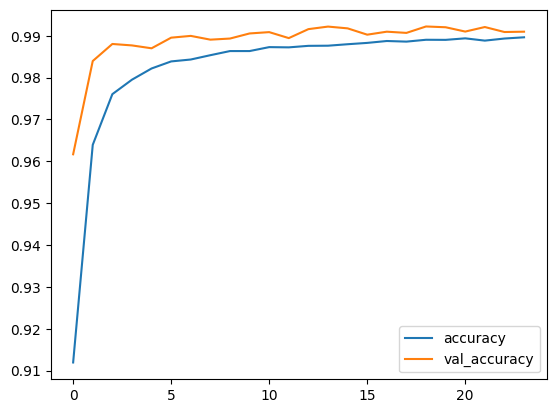

In [ ]:
pd.DataFrame(ANN_model.history.history)[["accuracy", "val_accuracy"]].plot()

<Axes: >

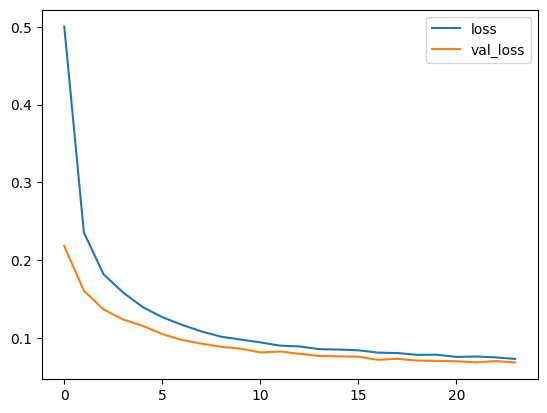

In [ ]:
pd.DataFrame(ANN_model.history.history)[["loss", "val_loss"]].plot()

<Axes: >

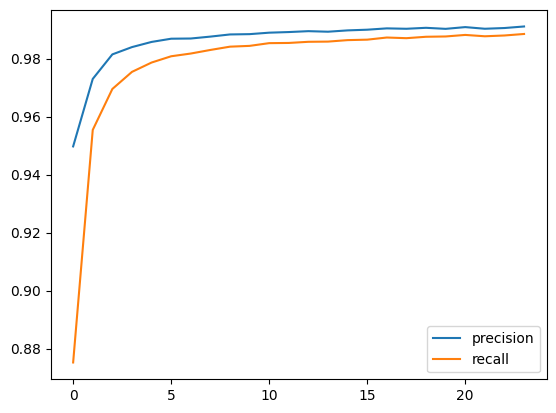

In [ ]:
pd.DataFrame(ANN_model.history.history)[["precision", "recall"]].plot()

<Axes: >

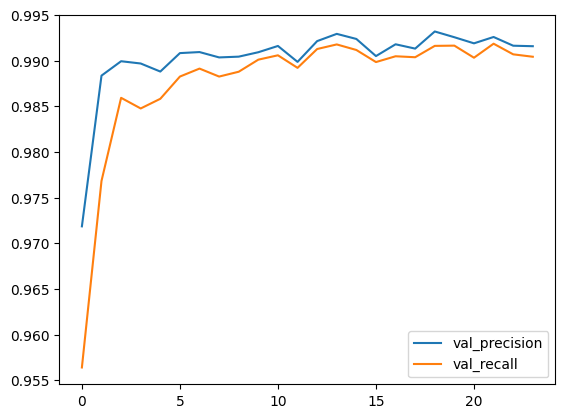

In [ ]:
pd.DataFrame(ANN_model.history.history)[["val_precision", "val_recall"]].plot()

In [ ]:
eval_save_dl_model(ANN_model, "ANN_model")

1181/1181 [==============================] - 12s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : ANN_model
f1_score    : 99.0753
precision   : 99.0757
recall      : 99.0977


## CNN

In [ ]:
CNN_model = Sequential()

CNN_model.add(Conv1D(64, 3,
                 padding="same",input_shape = (x_train.shape[1], 1), activation='relu'))
CNN_model.add(MaxPool1D(pool_size=(4)))
CNN_model.add(Dropout(0.2))
CNN_model.add(Conv1D(32, 3,
                 padding="same", activation='relu'))
CNN_model.add(MaxPool1D(pool_size=(4)))
CNN_model.add(Dropout(0.2))
CNN_model.add(Conv1D(16, 3,
                 padding="same", activation='relu'))
CNN_model.add(MaxPool1D(pool_size=(4)))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(units=64))
CNN_model.add(Dense(units=32))
CNN_model.add(Dense(units=23,activation='softmax'))


CNN_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy', Precision(), Recall()], run_eagerly=True)

CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 30, 64)            0         
 D)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 30, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 32)            

In [ ]:
CNN_model.fit(x=x_train, y=y_train, epochs=500, batch_size=256, validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/500
345/345 [==============================] - 27s 70ms/step - loss: 0.7185 - accuracy: 0.8153 - precision_1: 0.8950 - recall_1: 0.7102 - val_loss: 0.2701 - val_accuracy: 0.9325 - val_precision_1: 0.9646 - val_recall_1: 0.8989
Epoch 2/500
345/345 [==============================] - 25s 71ms/step - loss: 0.3124 - accuracy: 0.9131 - precision_1: 0.9482 - recall_1: 0.8853 - val_loss: 0.1876 - val_accuracy: 0.9439 - val_precision_1: 0.9639 - val_recall_1: 0.9302
Epoch 3/500
345/345 [==============================] - 23s 68ms/step - loss: 0.2446 - accuracy: 0.9275 - precision_1: 0.9520 - recall_1: 0.9084 - val_loss: 0.1434 - val_accuracy: 0.9580 - val_precision_1: 0.9671 - val_recall_1: 0.9426
Epoch 4/500
345/345 [==============================] - 24s 70ms/step - loss: 0.2040 - accuracy: 0.9380 - precision_1: 0.9549 - recall_1: 0.9232 - val_loss: 0.1219 - val_accuracy: 0.9577 - val_precision_1: 0.9635 - val_recall_1: 0.9530
Epoch 5/500
345/345 [==============================] - 24s 7

<Axes: >

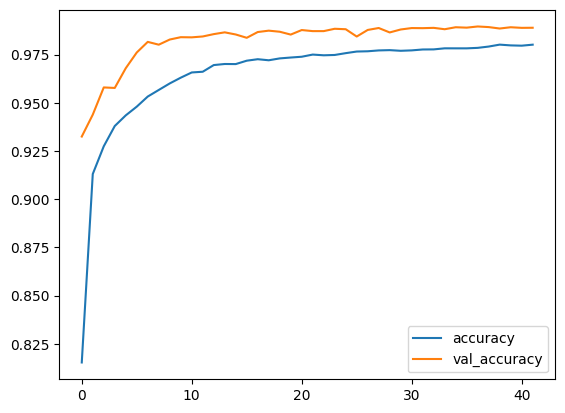

In [ ]:
pd.DataFrame(CNN_model.history.history)[["accuracy", "val_accuracy"]].plot()

<Axes: >

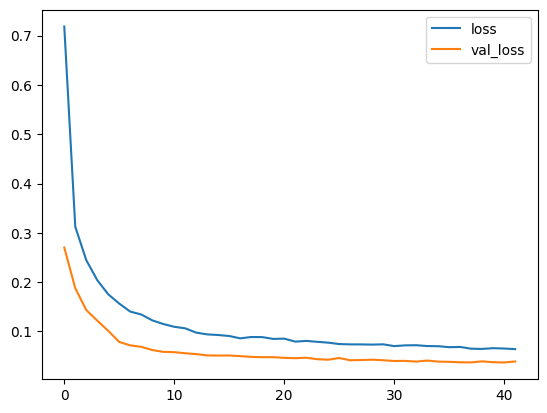

In [ ]:
pd.DataFrame(CNN_model.history.history)[["loss", "val_loss"]].plot()

<Axes: >

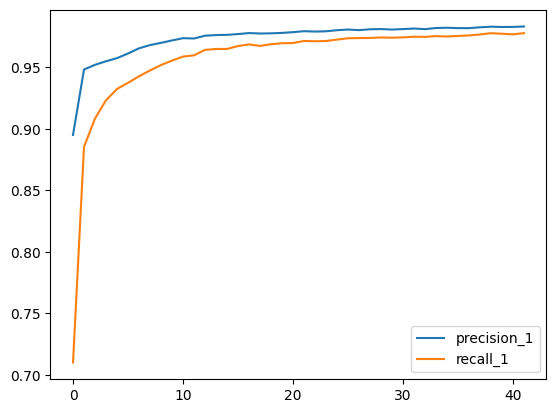

In [ ]:
pd.DataFrame(CNN_model.history.history)[["precision_1", "recall_1"]].plot()

<Axes: >

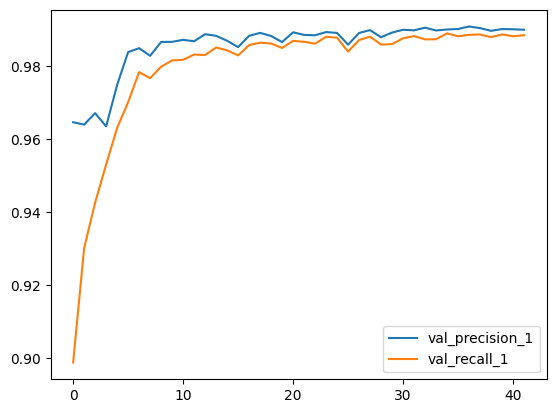

In [ ]:
pd.DataFrame(CNN_model.history.history)[["val_precision_1", "val_recall_1"]].plot()

In [ ]:
eval_save_dl_model(CNN_model, "CNN_model")

1181/1181 [==============================] - 12s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : CNN_model
f1_score    : 98.7815
precision   : 98.7414
recall      : 98.8966


## GRU

In [ ]:
GRU_model = Sequential()

GRU_model.add(GRU(units=256, input_shape=(None, x_train.shape[1])))
GRU_model.add(Dropout(0.4))
GRU_model.add(Dense(units=128, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
GRU_model.add(Dropout(0.4))
GRU_model.add(Dense(units=512, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
GRU_model.add(Dropout(0.4))
GRU_model.add(Dense(units=128, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
GRU_model.add(Dropout(0.4))
GRU_model.add(Dense(units=23, activation='softmax'))

GRU_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy', Precision(), Recall()], run_eagerly=True)

GRU_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               291840    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               66048     
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
GRU_model.fit(x=np.asarray(x_train)[:, np.newaxis, :], y=y_train, epochs=200, batch_size=256, validation_data=(np.asarray(x_val)[:, np.newaxis, :], y_val), callbacks=[early_stop])

Epoch 1/200
345/345 [==============================] - 36s 100ms/step - loss: 0.3855 - accuracy: 0.9361 - precision_2: 0.9683 - recall_2: 0.9081 - val_loss: 0.1719 - val_accuracy: 0.9838 - val_precision_2: 0.9884 - val_recall_2: 0.9782
Epoch 2/200
345/345 [==============================] - 29s 84ms/step - loss: 0.1674 - accuracy: 0.9815 - precision_2: 0.9851 - recall_2: 0.9775 - val_loss: 0.1332 - val_accuracy: 0.9876 - val_precision_2: 0.9893 - val_recall_2: 0.9870
Epoch 3/200
345/345 [==============================] - 29s 85ms/step - loss: 0.1307 - accuracy: 0.9852 - precision_2: 0.9878 - recall_2: 0.9826 - val_loss: 0.1115 - val_accuracy: 0.9878 - val_precision_2: 0.9894 - val_recall_2: 0.9863
Epoch 4/200
345/345 [==============================] - 35s 100ms/step - loss: 0.1085 - accuracy: 0.9871 - precision_2: 0.9893 - recall_2: 0.9852 - val_loss: 0.0947 - val_accuracy: 0.9884 - val_precision_2: 0.9901 - val_recall_2: 0.9875
Epoch 5/200
345/345 [==============================] - 29s

<Axes: >

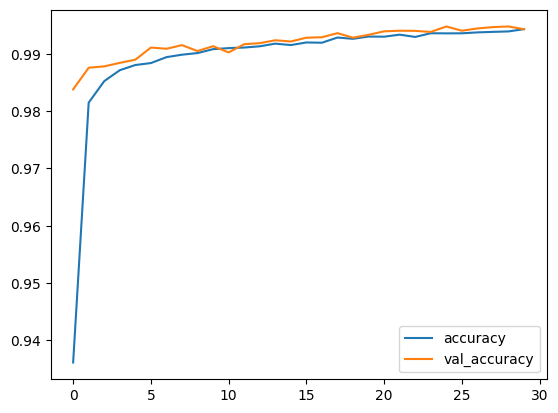

In [ ]:
pd.DataFrame(GRU_model.history.history)[["accuracy", "val_accuracy"]].plot()

<Axes: >

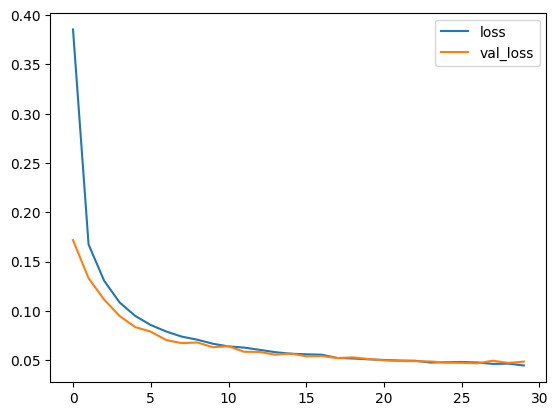

In [ ]:
pd.DataFrame(GRU_model.history.history)[["loss", "val_loss"]].plot()

<Axes: >

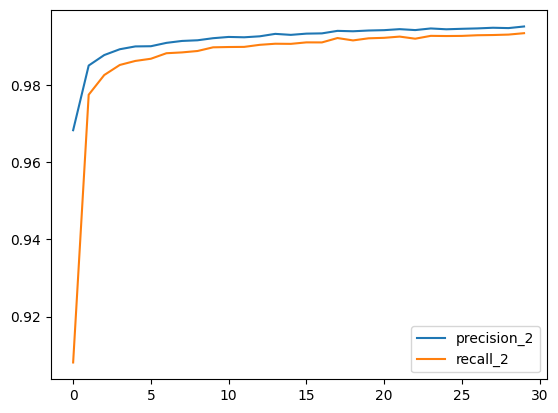

In [ ]:
pd.DataFrame(GRU_model.history.history)[["precision_2", "recall_2"]].plot()

<Axes: >

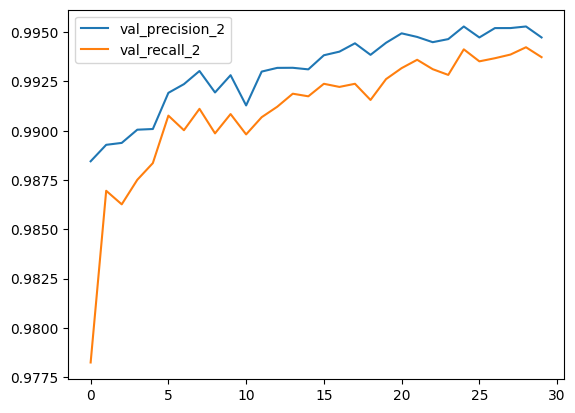

In [ ]:
pd.DataFrame(GRU_model.history.history)[["val_precision_2", "val_recall_2"]].plot()

In [ ]:
eval_save_dl_model(GRU_model, "GRU_model")

1181/1181 [==============================] - 15s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : GRU_model
f1_score    : 99.4097
precision   : 99.3979
recall      : 99.4285


## LSTM

In [ ]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(units=256, input_shape=(None, x_train.shape[1])))
LSTM_model.add(Dropout(0.4))
LSTM_model.add(Dense(units=128, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
LSTM_model.add(Dropout(0.4))
LSTM_model.add(Dense(units=512, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
LSTM_model.add(Dropout(0.4))
LSTM_model.add(Dense(units=128, activation='relu',
                        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=L2(1e-4),
                        activity_regularizer=L2(1e-5)))
LSTM_model.add(Dropout(0.4))
LSTM_model.add(Dense(units=23, activation='softmax'))

LSTM_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy', Precision(), Recall()], run_eagerly=True)

LSTM_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               388096    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               66048     
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
LSTM_model.fit(x=np.asarray(x_train)[:, np.newaxis, :], y=y_train, epochs=200, batch_size=256, validation_data=(np.asarray(x_val)[:, np.newaxis, :], y_val), callbacks=[early_stop])

Epoch 1/200
345/345 [==============================] - 31s 87ms/step - loss: 0.4204 - accuracy: 0.9264 - precision_3: 0.9668 - recall_3: 0.8929 - val_loss: 0.1799 - val_accuracy: 0.9731 - val_precision_3: 0.9788 - val_recall_3: 0.9623
Epoch 2/200
345/345 [==============================] - 34s 100ms/step - loss: 0.1579 - accuracy: 0.9802 - precision_3: 0.9850 - recall_3: 0.9758 - val_loss: 0.1230 - val_accuracy: 0.9873 - val_precision_3: 0.9895 - val_recall_3: 0.9857
Epoch 3/200
345/345 [==============================] - 35s 100ms/step - loss: 0.1199 - accuracy: 0.9857 - precision_3: 0.9887 - recall_3: 0.9833 - val_loss: 0.0993 - val_accuracy: 0.9893 - val_precision_3: 0.9907 - val_recall_3: 0.9886
Epoch 4/200
345/345 [==============================] - 30s 86ms/step - loss: 0.0989 - accuracy: 0.9879 - precision_3: 0.9899 - recall_3: 0.9861 - val_loss: 0.0863 - val_accuracy: 0.9890 - val_precision_3: 0.9907 - val_recall_3: 0.9884
Epoch 5/200
345/345 [==============================] - 35s

<Axes: >

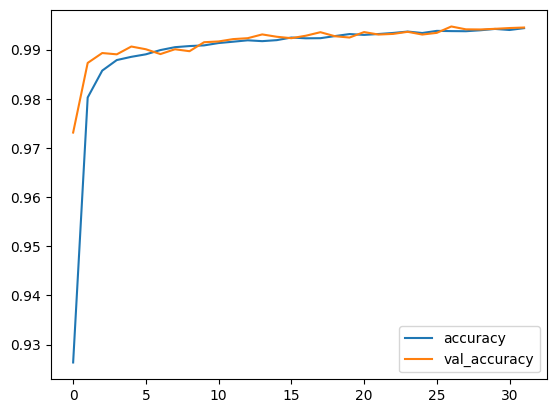

In [ ]:
pd.DataFrame(LSTM_model.history.history)[["accuracy", "val_accuracy"]].plot()

<Axes: >

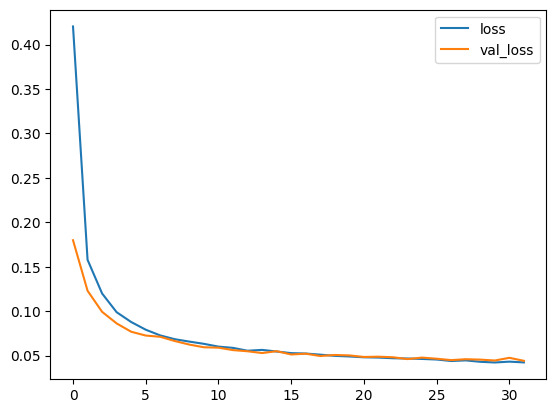

In [ ]:
pd.DataFrame(LSTM_model.history.history)[["loss", "val_loss"]].plot()

<Axes: >

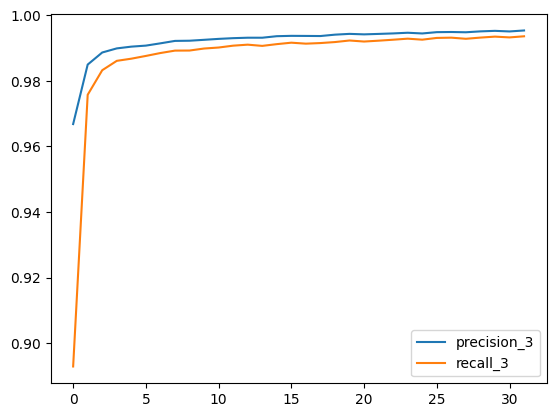

In [ ]:
pd.DataFrame(LSTM_model.history.history)[["precision_3", "recall_3"]].plot()

<Axes: >

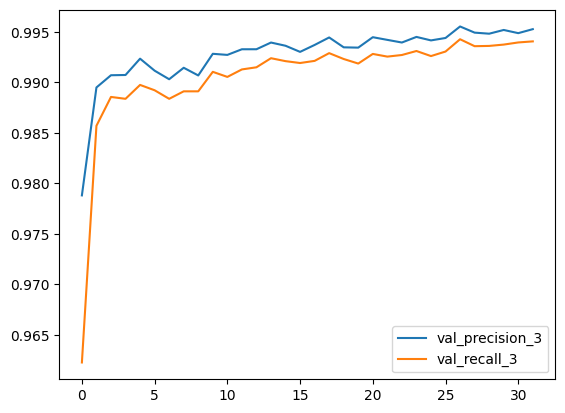

In [ ]:
pd.DataFrame(LSTM_model.history.history)[["val_precision_3", "val_recall_3"]].plot()

In [ ]:
eval_save_dl_model(LSTM_model, "LSTM_model")

1181/1181 [==============================] - 17s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : LSTM_model
f1_score    : 99.4228
precision   : 99.4034
recall      : 99.4470


## CNN - LSTM

In [ ]:
CNN_LSTM_model = Sequential()

CNN_LSTM_model.add(Conv1D(128, 3,
                 padding="same",input_shape = (x_train.shape[1], 1), activation='relu'))
CNN_LSTM_model.add(MaxPool1D(pool_size=(4)))
CNN_LSTM_model.add(Conv1D(65, 3,
                 padding="same", activation='relu'))
CNN_LSTM_model.add(MaxPool1D(pool_size=(4)))
CNN_LSTM_model.add(Conv1D(32, 3,
                 padding="same", activation='relu'))
CNN_LSTM_model.add(MaxPool1D(pool_size=(4)))
CNN_LSTM_model.add(LSTM(units=128))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(units=64))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(units=23,activation='softmax'))


CNN_LSTM_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy', Precision(), Recall()], run_eagerly=True)

CNN_LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 122, 128)          512       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 30, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 30, 65)            25025     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 7, 65)             0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 7, 32)             6272      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 1, 32)            

In [ ]:
CNN_LSTM_model.fit(x=x_train, y=y_train, epochs=200, batch_size=256, validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/200
345/345 [==============================] - 30s 81ms/step - loss: 0.4563 - accuracy: 0.8784 - precision_4: 0.9421 - recall_4: 0.8263 - val_loss: 0.1616 - val_accuracy: 0.9516 - val_precision_4: 0.9637 - val_recall_4: 0.9463
Epoch 2/200
345/345 [==============================] - 27s 79ms/step - loss: 0.1239 - accuracy: 0.9657 - precision_4: 0.9727 - recall_4: 0.9594 - val_loss: 0.0721 - val_accuracy: 0.9800 - val_precision_4: 0.9849 - val_recall_4: 0.9757
Epoch 3/200
345/345 [==============================] - 27s 79ms/step - loss: 0.0734 - accuracy: 0.9791 - precision_4: 0.9826 - recall_4: 0.9759 - val_loss: 0.0578 - val_accuracy: 0.9822 - val_precision_4: 0.9838 - val_recall_4: 0.9803
Epoch 4/200
345/345 [==============================] - 27s 78ms/step - loss: 0.0586 - accuracy: 0.9835 - precision_4: 0.9858 - recall_4: 0.9814 - val_loss: 0.0520 - val_accuracy: 0.9847 - val_precision_4: 0.9860 - val_recall_4: 0.9839
Epoch 5/200
345/345 [==============================] - 27s 7

<Axes: >

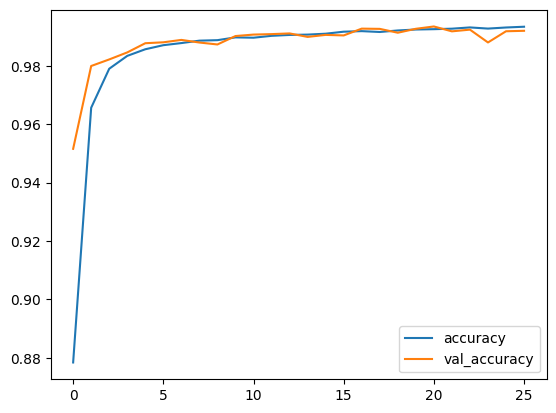

In [ ]:
pd.DataFrame(CNN_LSTM_model.history.history)[["accuracy", "val_accuracy"]].plot()

<Axes: >

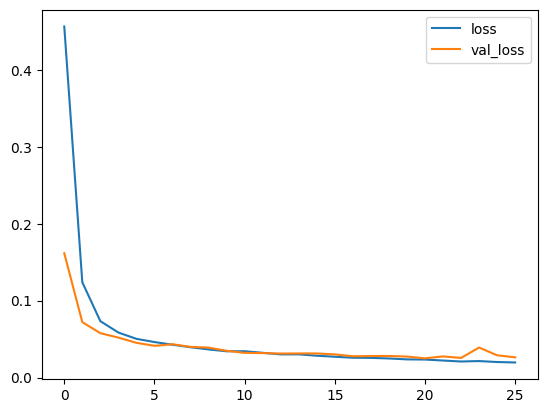

In [ ]:
pd.DataFrame(CNN_LSTM_model.history.history)[["loss", "val_loss"]].plot()

<Axes: >

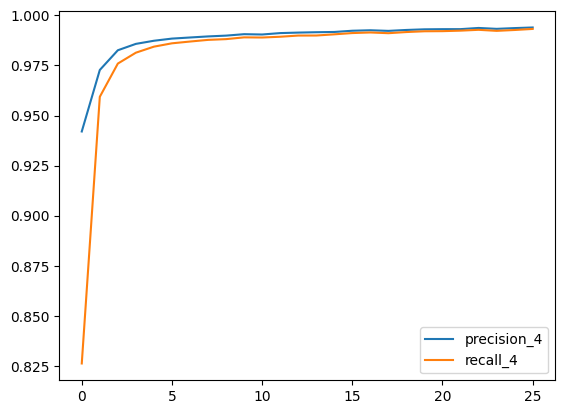

In [ ]:
pd.DataFrame(CNN_LSTM_model.history.history)[["precision_4", "recall_4"]].plot()

<Axes: >

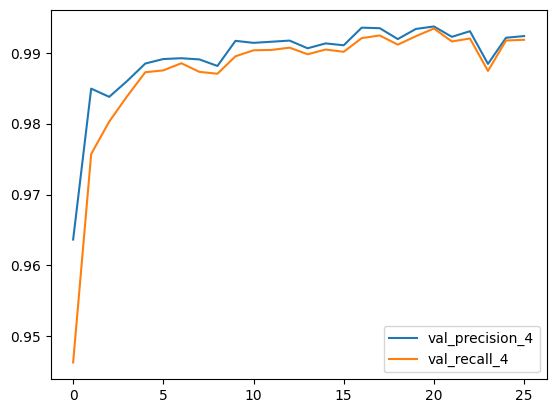

In [ ]:
pd.DataFrame(CNN_LSTM_model.history.history)[["val_precision_4", "val_recall_4"]].plot()

In [ ]:
eval_save_dl_model(CNN_LSTM_model, "CNN_LSTM_model")

1181/1181 [==============================] - 16s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model       : CNN_LSTM_model
f1_score    : 99.1904
precision   : 99.1861
recall      : 99.2062


# Evaluation

In [4]:
metrics = pickle.load(open("./Saved_models/model_metrics.pkl", "rb"))

## F1 score

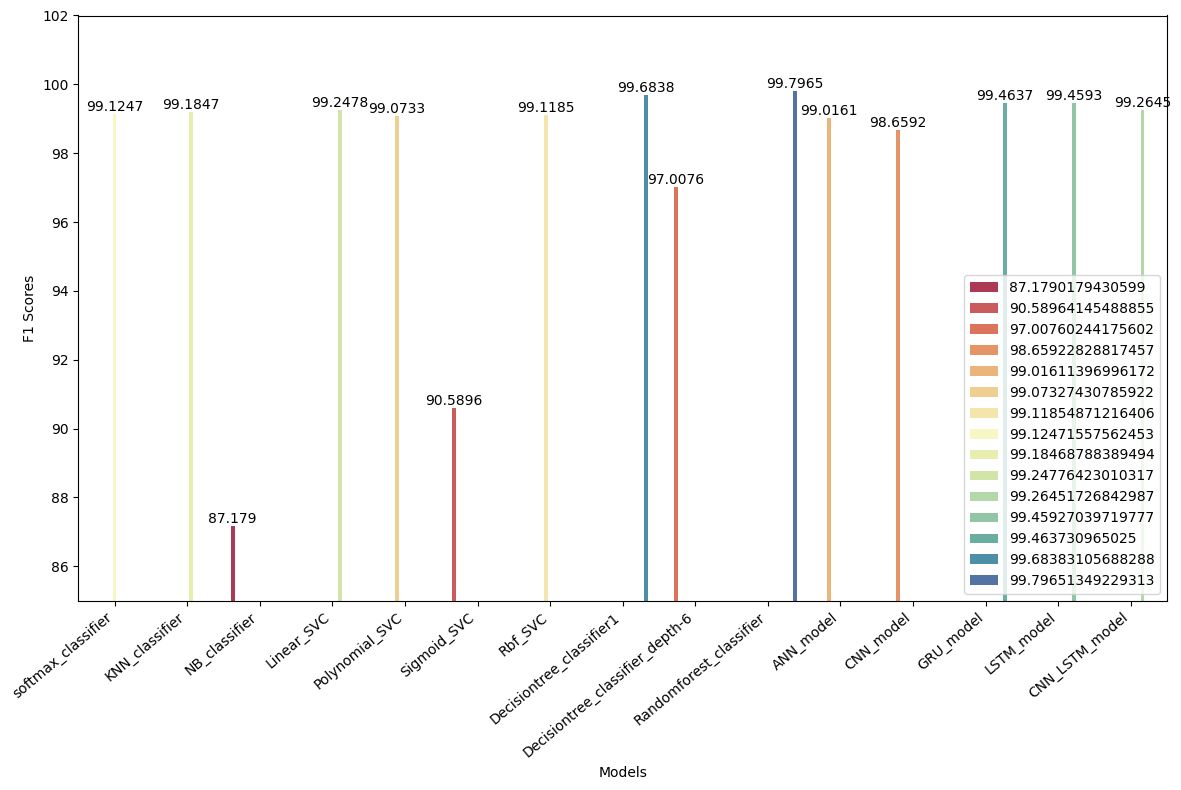

In [5]:
plt.figure(figsize=(12, 8))
f1_ax = sns.barplot(x=metrics[0], y=metrics[1], palette="Spectral", hue=metrics[1])
f1_ax.set_xticklabels(f1_ax.get_xticklabels(), rotation=40, ha='right')
for i in f1_ax.containers:
    f1_ax.bar_label(i,)
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.ylim(85, 102)
plt.tight_layout()
plt.legend(loc="lower right")
plt.show()

## Precision

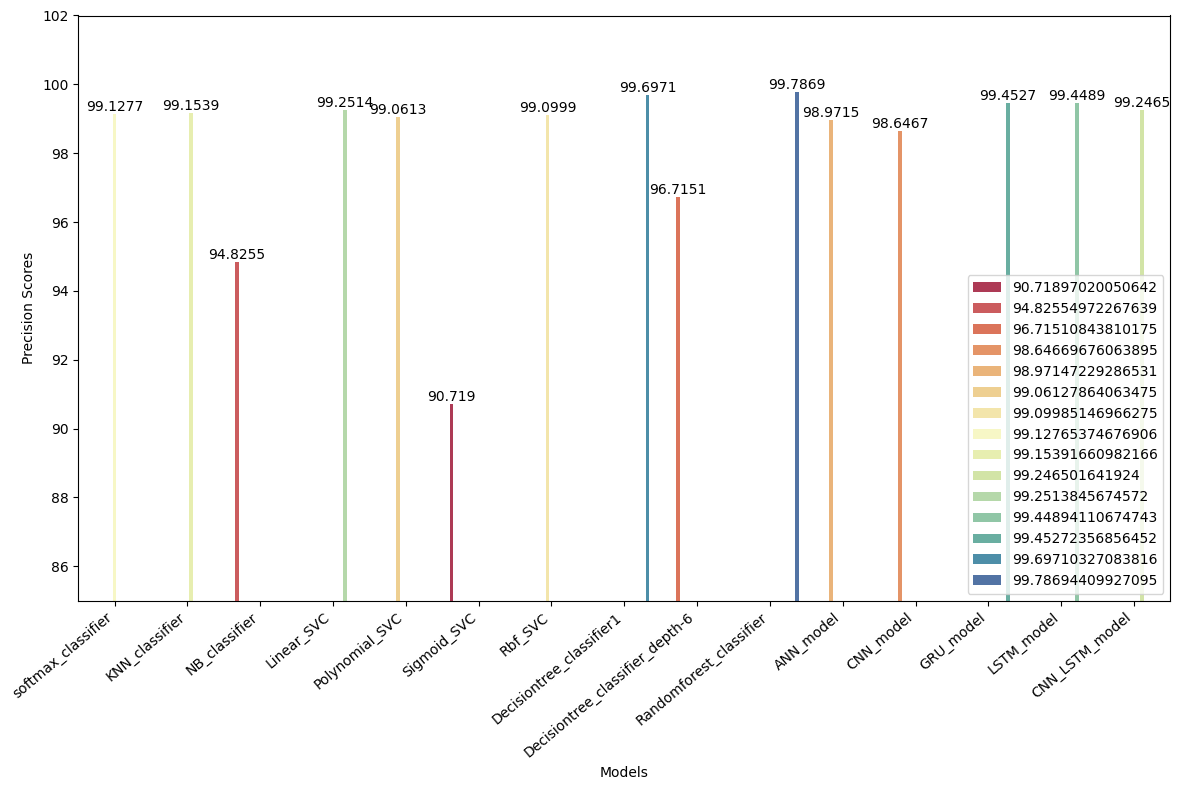

In [6]:
plt.figure(figsize=(12, 8))
f1_ax = sns.barplot(x=metrics[0], y=metrics[2], palette="Spectral", hue=metrics[2])
f1_ax.set_xticklabels(f1_ax.get_xticklabels(), rotation=40, ha='right')
for i in f1_ax.containers:
    f1_ax.bar_label(i,)
plt.xlabel('Models')
plt.ylabel('Precision Scores')
plt.ylim(85, 102)
plt.tight_layout()
plt.legend(loc="lower right")
plt.show()

## Recall

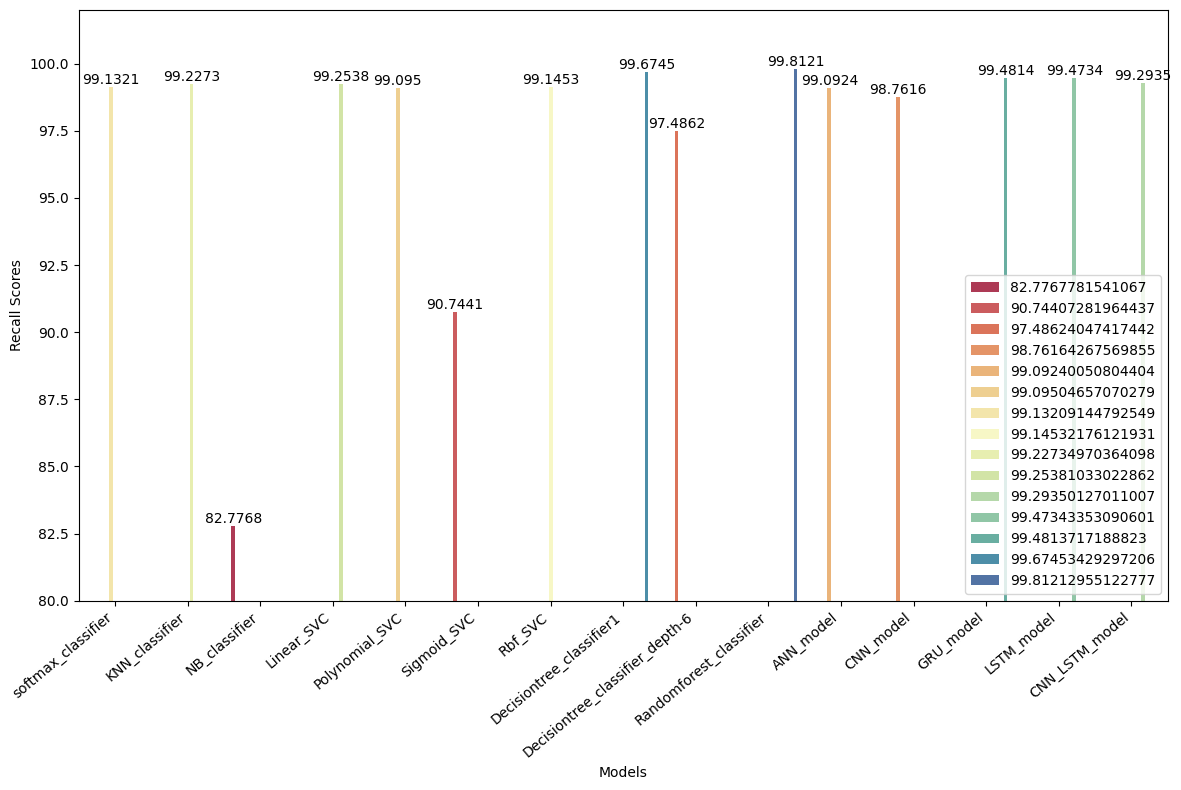

In [7]:
plt.figure(figsize=(12, 8))
f1_ax = sns.barplot(x=metrics[0], y=metrics[3], palette="Spectral", hue=metrics[3])
f1_ax.set_xticklabels(f1_ax.get_xticklabels(), rotation=40, ha='right')
for i in f1_ax.containers:
    f1_ax.bar_label(i,)
plt.xlabel('Models')
plt.ylabel('Recall Scores')
plt.ylim(80, 102)
plt.tight_layout()
plt.legend(loc="lower right")
plt.show()

In [ ]:
max_f1, max_precision, max_recall = [0, 0], [0, 0], [0, 0]
for i in range(len(metrics[0])):
    if max_f1[0] < metrics[1][i]:
        max_f1[0] = metrics[1][i]
        max_f1[1] = i
    if max_precision[0] < metrics[2][i]:
        max_precision[0] = metrics[2][i]
        max_precision[1] = i
    if max_recall[0] < metrics[3][i]:
        max_recall[0] = metrics[3][i]
        max_recall[1] = i

In [ ]:
print(f"Maximum F1 Score        : {max_f1[0]}")
print(f"Model                   : {metrics[0][max_f1[1]]}")

Maximum F1 Score        : 99.79651349229313
Model                   : Randomforest_classifier


In [ ]:
print(f"Maximum Precision Score : {max_precision[0]}")
print(f"Model                   : {metrics[0][max_precision[1]]}")

Maximum Precision Score : 99.78694409927095
Model                   : Randomforest_classifier


In [ ]:
print(f"Maximum Recall Score    : {max_recall[0]}")
print(f"Model                   : {metrics[0][max_recall[1]]}")

Maximum Recall Score    : 99.81212955122777
Model                   : Randomforest_classifier
